In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

TIC = 'TIC 332534326'

In [2]:
search_ffi = lk.search_tesscut(TIC)

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,TESScut,1426,TIC 332534326,0.0
1,TESS Sector 31,2020,TESScut,475,TIC 332534326,0.0


In [4]:
search_tpf = lk.search_targetpixelfile(TIC)

In [5]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,TESS-SPOC,1800,332534326,0.0
1,TESS Sector 31,2020,TESS-SPOC,600,332534326,0.0


In [6]:
search_lcf = lk.search_lightcurve(TIC)

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,TESS-SPOC,1800,332534326,0.0
1,TESS Sector 05,2018,QLP,1800,332534326,0.0
2,TESS Sector 05,2018,TASOC,1800,332534326,0.0
3,TESS Sector 05,2018,TASOC,1800,332534326,0.0
4,TESS Sector 31,2020,TESS-SPOC,600,332534326,0.0
5,TESS Sector 31,2020,QLP,600,332534326,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 31,2020,TESS-SPOC,600,332534326,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 332534326" SECTOR=31 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [12]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2144.528762298477,1.1806069e+03,3.3152678e+00,4.2112963e-03,132057,261.25034,1021.92536,7.8566693e+02,2.1844306e+00,6.2293243e+02,8.9706945e-01,1.1806069e+03,3.3152678e+00,0,———,———,———,———,261.25034,1.7112015e-03,1021.92536,1.8904258e-03,2.9797036e-02,1.4315337e-01
2144.535707032747,1.1834969e+03,3.3143594e+00,4.2115892e-03,132058,261.24987,1021.92491,7.8774554e+02,2.1838319e+00,6.2070966e+02,8.9498973e-01,1.1834969e+03,3.3143594e+00,0,———,———,———,———,261.24987,1.7094543e-03,1021.92491,1.8857892e-03,3.0335108e-02,1.4155206e-01
2144.542651767017,1.1877679e+03,3.3167338e+00,4.2118821e-03,132059,261.24764,1021.92505,7.9054181e+02,2.1853964e+00,6.2113684e+02,8.9560640e-01,1.1877679e+03,3.3167338e+00,0,———,———,———,———,261.24764,1.7045026e-03,1021.92505,1.8812648e-03,2.8249901e-02,1.4122888e-01
2144.54959650082,1.1838447e+03,3.3228388e+00,4.2121746e-03,132060,261.24765,1021.92560,7.8796899e+02,2.1894188e+00,6.2257898e+02,8.9677829e-01,1.1838447e+03,3.3228388e+00,0,———,———,———,———,261.24765,1.7124320e-03,1021.92560,1.8918212e-03,2.7541401e-02,1.4162153e-01
2144.556541234624,1.1814186e+03,3.3159509e+00,4.2124670e-03,132061,261.24743,1021.92368,7.8623584e+02,2.1848805e+00,6.2191333e+02,8.9724332e-01,1.1814186e+03,3.3159509e+00,0,———,———,———,———,261.24743,1.7125461e-03,1021.92368,1.8883547e-03,2.6667211e-02,1.4118983e-01
2144.5634859684283,1.1876816e+03,3.3168223e+00,4.2127594e-03,132062,261.24936,1021.92198,7.9034827e+02,2.1854546e+00,6.2072083e+02,8.9600927e-01,1.1876816e+03,3.3168223e+00,0,———,———,———,———,261.24936,1.7034303e-03,1021.92198,1.8798989e-03,2.6832677e-02,1.4128184e-01
2144.5704307017663,1.1811913e+03,3.3122077e+00,4.2130514e-03,132063,261.24884,1021.92298,7.8606604e+02,2.1824141e+00,6.2040271e+02,8.9612877e-01,1.1811913e+03,3.3122077e+00,0,———,———,———,———,261.24884,1.7091748e-03,1021.92298,1.8881927e-03,2.6370591e-02,1.4128818e-01
2144.5773754351053,1.1792498e+03,3.3128746e+00,4.2133434e-03,132064,261.24760,1021.92199,7.8465594e+02,2.1828535e+00,6.2069189e+02,8.9572251e-01,1.1792498e+03,3.3128746e+00,0,———,———,———,———,261.24760,1.7164298e-03,1021.92199,1.8910704e-03,2.5278578e-02,1.4015758e-01


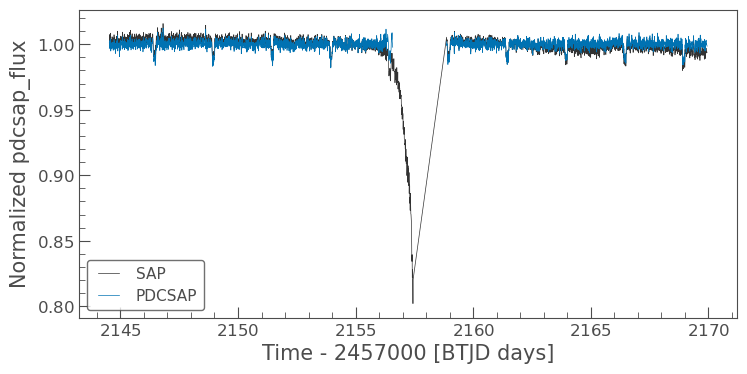

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 332534326')

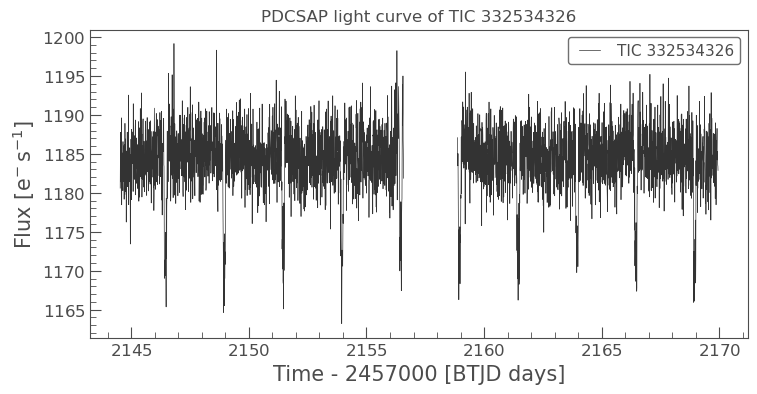

In [14]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 332534326")

In [15]:
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=2.500141001410014052)
binned_lc = folded_lc.bin(time_bin_size=0.01)

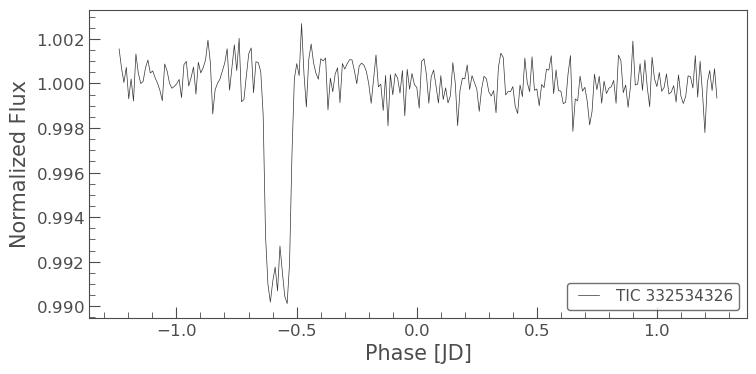

In [16]:
lcf[0].flatten(window_length=401).fold(period=2.500141001410014052).bin(time_bin_size=0.01).plot();

In [17]:
lcf[0].interact_bls()

In [18]:
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 332534326, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

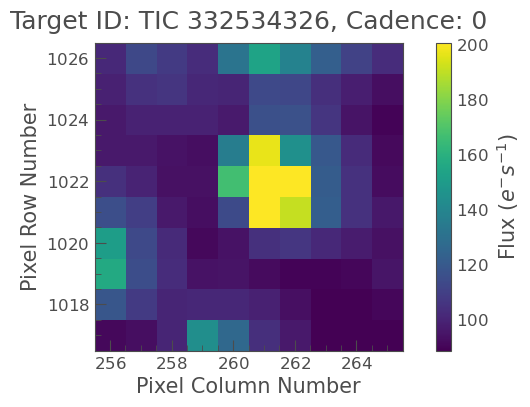

In [19]:
ffi_data.plot()

In [20]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

1

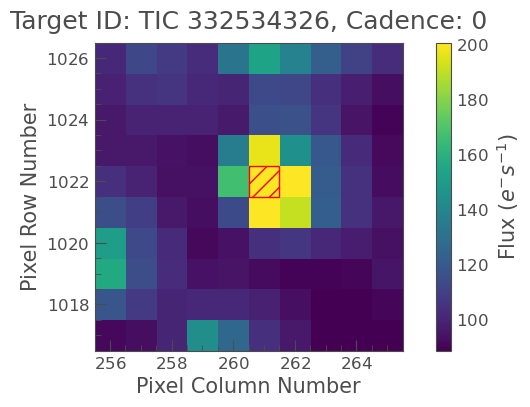

In [21]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [22]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [23]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2144.5219745744835,295.5213928222656,0.8786896467208862,261.0,1022.0,0,0
2144.52891925753,296.5681457519531,0.8802027702331543,261.0,1022.0,1,0
2144.5358639405777,294.8565368652344,0.8778886795043945,261.0,1022.0,2,0
2144.5428086231586,295.7752685546875,0.8789798617362976,261.0,1022.0,3,0
2144.5497533057387,296.2066650390625,0.880426287651062,261.0,1022.0,4,0
2144.5566979883206,296.53900146484375,0.8799889087677002,261.0,1022.0,5,0
2144.563642670437,297.15771484375,0.880797266960144,261.0,1022.0,6,0
2144.5705873525512,295.486328125,0.8789058923721313,261.0,1022.0,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

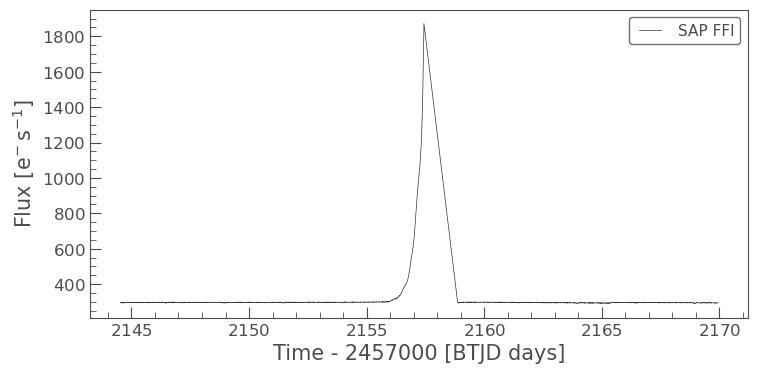

In [24]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

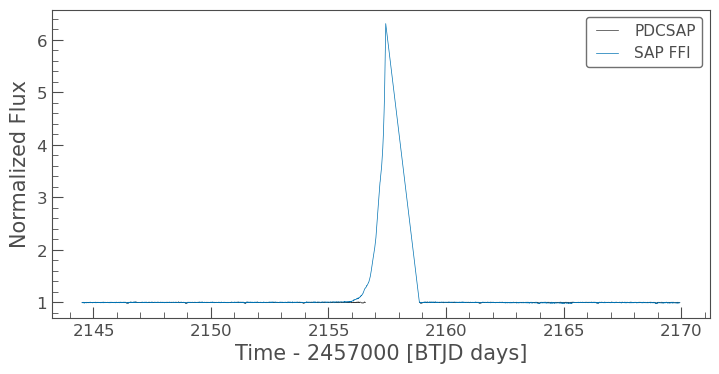

In [25]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [26]:
ffi_data.interact()

In [27]:
ffi_data.interact_sky()

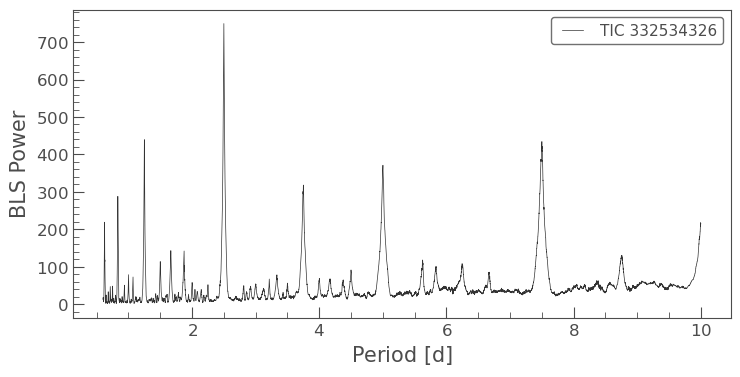

In [28]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [29]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 2.500 d


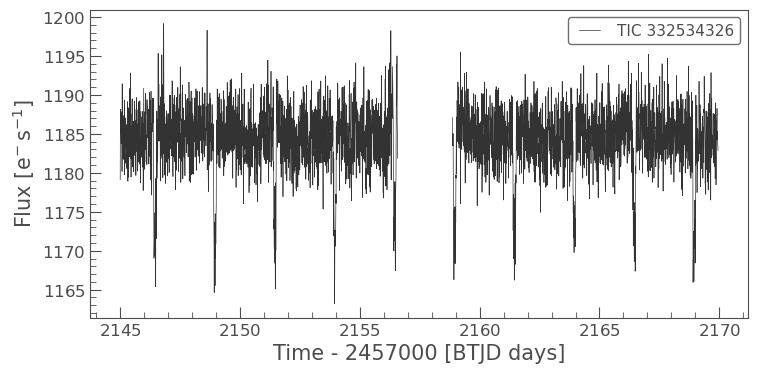

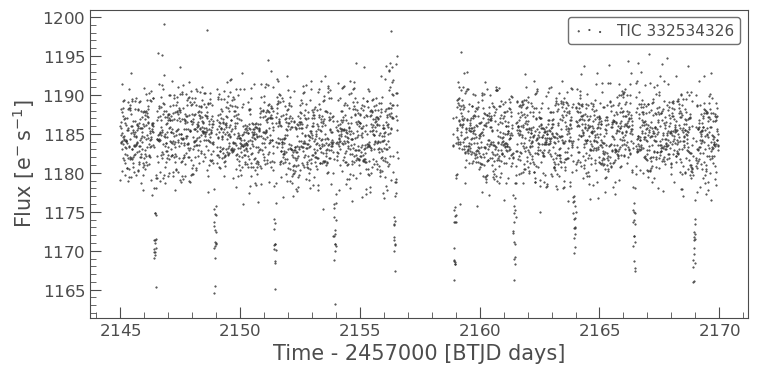

In [30]:
mask = ((lcf[0].time.value < 2170)&(lcf[0].time.value > 2145))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [31]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 1039.795906)

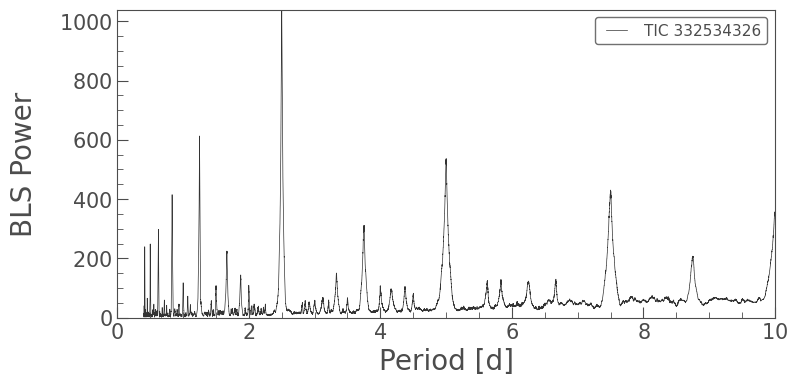

In [32]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 1039.795906])

In [33]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [34]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 2.500141001410014052 d
BLS max power = 1039.795906
Epoch max power = 2459146.451004
----------------------------------------
Period at 2th max power = 2.499548995489954795 d
BLS max power = 1033.809204
Epoch max power = 2459146.456004
----------------------------------------
Period at 3th max power = 2.500437004370043681 d
BLS max power = 1029.268659
Epoch max power = 2459146.451004
----------------------------------------
Period at 4th max power = 2.500733007330073310 d
BLS max power = 1022.379612
Epoch max power = 2459146.451004
----------------------------------------
Period at 5th max power = 2.499252992529925166 d
BLS max power = 1021.901174
Epoch max power = 2459146.456004
----------------------------------------
Period at 6th max power = 2.499844998449984423 d
BLS max power = 1021.686575
Epoch max power = 2459146.446004
----------------------------------------
Period at 7th max power = 2.498956989569895981 d
BLS max power = 1018.690590
Epoch max power =

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(1160.0, 1200.0)

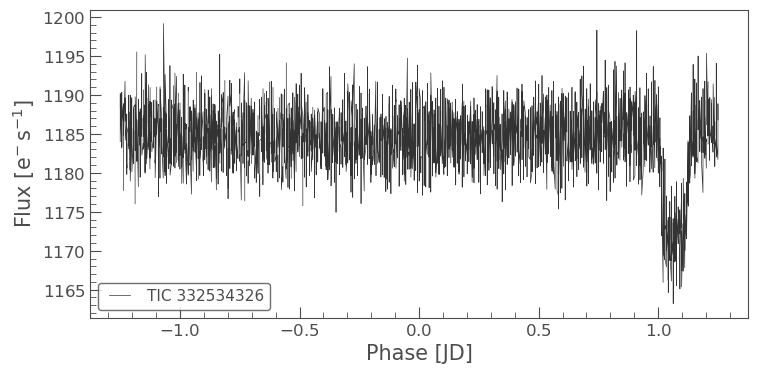

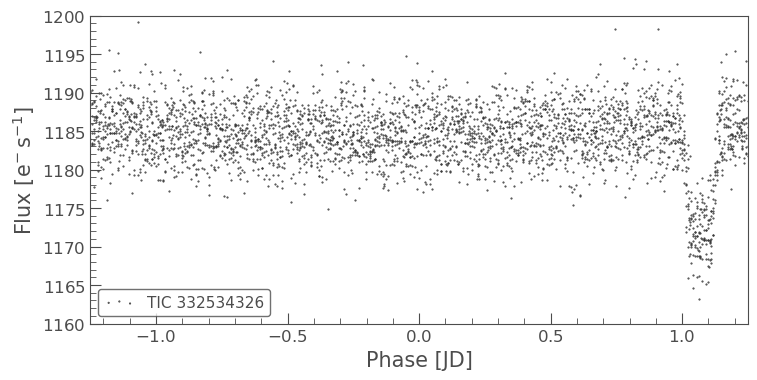

In [35]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 2.500141001410014052
epochtime = 2459146.451004
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.25,1.25)
plt.ylim([1160,1200])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(1160.0, 1200.0)

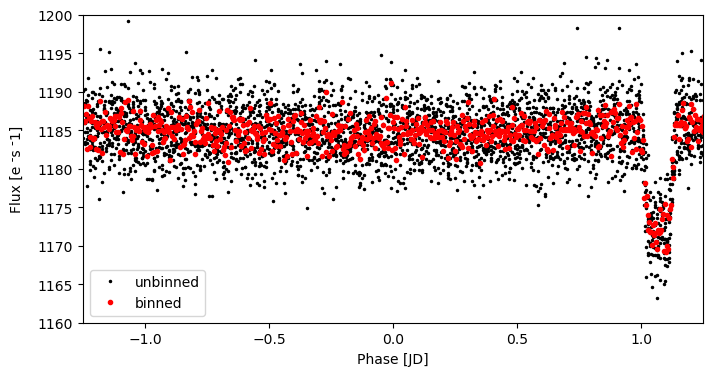

In [36]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.25,1.25)
plt.ylim([1160,1200])

In [37]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  1169.2191162109375 electron / s
median flux = 1184.8922119140625 electron / s
Tdepth =  15.673095703125 electron / s
Tdepth in ppm =  15673095.703125 electron / s ppm
Rp/Rs ratio =  3.958926079522703 electron(1/2) / s(1/2)


In [38]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [39]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 2.4000000000000004 d hours


In [40]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  12.514012052528615 electron / s
depth in ppm = 12514012.052528616 electron / s ppm


In [41]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

2.500141001410014 d
2146.4510038181015
0.1 d


In [42]:
P = 2.500141001410014052 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.02 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 5428761013.743949 m
a = 5428761.013743949 km
a = 0.03628902529857962 AU
The planetary mass was neglected


In [43]:
L = 1.436256 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.1426667373855215 AU
The outer boundary of the habitable zone ro = 1.6461825479369157 AU


In [44]:
Rs = 1.21311 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 3344251.408523083 electron(1/2) / s(1/2) km
Rp= 524.917816437464 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 6.426569336872475


In [45]:
P = 2.500141001410014052 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 156746.41760284422 m/s


In [46]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  2.500141001410014 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  2.4000000000000004 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  15.673095703125 electron / s
Transit depth in ppm =  15673095.703125 electron / s ppm
Transit Depth from bls model in ppm = 12514012.052528616 electron / s ppm
Rp/Rs ratio =  3.958926079522703 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 3344251.408523083 electron(1/2) / s(1/2) km
Rp= 524.917816437464 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 6.426569336872475
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 156746.41760284422 m/s
- - - - - - - - - - - - - - - - - - - - 


In [ ]:
lk.show_citation_instructions()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
